In [ ]:
# binomial, possion, normal distrubution, z score for outliers

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
education_districtwise = pd.read_csv("../week4/education_districtwise.csv")
# removing NaN values
education_districtwise = education_districtwise.dropna()

education_districtwise.head()

,AC_YEAR,STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,...,UUNI_ALL,UUNI_SC,UUNI_ST,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,2015-16,1,101,JAMMU & KASHMIR,KUPWARA,1,13,391,104,875564.0,...,21322,26,2594,3489,5315,27,62,23,852,239
1,2015-16,1,102,JAMMU & KASHMIR,BARAMULA,1,18,678,144,1015503.0,...,17307,0,1571,4127,5800,210,53,30,1665,360
2,2015-16,1,103,JAMMU & KASHMIR,SRINAGAR,1,8,94,65,1269751.0,...,5444,31,408,817,3284,886,11,0,2873,40
3,2015-16,1,104,JAMMU & KASHMIR,BADGAM,1,13,523,104,735753.0,...,12469,18,857,2290,3837,119,45,8,1035,325
4,2015-16,1,105,JAMMU & KASHMIR,PULWAMA,1,8,359,64,570060.0,...,7408,17,855,1688,2584,151,67,5,1101,209


<Axes: >

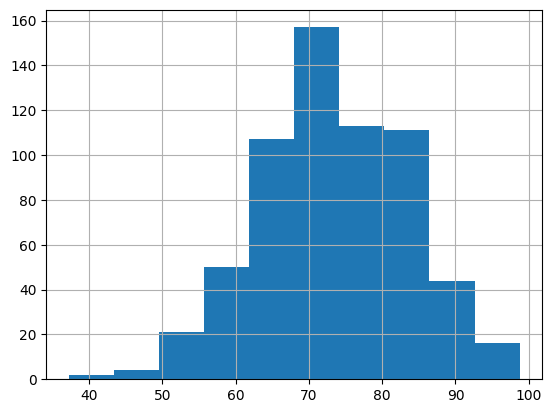

In [ ]:
education_districtwise["OVERALL_LI"].hist()

In [ ]:
mean_overall_li = education_districtwise["OVERALL_LI"].mean()
mean_overall_li

np.float64(73.320224)

In [ ]:
std_overall_li = education_districtwise["OVERALL_LI"].std()
std_overall_li

np.float64(10.120713572618008)

In [ ]:
lower_limit = mean_overall_li - 1 * std_overall_li
upper_limit = mean_overall_li + 1 * std_overall_li
(
    (education_districtwise["OVERALL_LI"] >= lower_limit)
    & (education_districtwise["OVERALL_LI"] <= upper_limit)
).mean()

np.float64(0.6656)

In [ ]:
lower_limit = mean_overall_li - 2 * std_overall_li
upper_limit = mean_overall_li + 2 * std_overall_li
(
    (education_districtwise["OVERALL_LI"] >= lower_limit)
    & (education_districtwise["OVERALL_LI"] <= upper_limit)
).mean()

np.float64(0.9536)

In [ ]:
lower_limit = mean_overall_li - 3 * std_overall_li
upper_limit = mean_overall_li + 3 * std_overall_li
(
    (education_districtwise["OVERALL_LI"] >= lower_limit)
    & (education_districtwise["OVERALL_LI"] <= upper_limit)
).mean()

np.float64(0.9968)

In [ ]:
# z score is basically the standard deviation value to check outliers, so if it's less than -3 and more than +3 SD then they are outliers

In [ ]:
education_districtwise["Z_SCORE"] = stats.zscore(education_districtwise["OVERALL_LI"])
education_districtwise

,AC_YEAR,STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,...,UUNI_SC,UUNI_ST,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G,Z_SCORE
0,2015-16,1,101,JAMMU & KASHMIR,KUPWARA,1,13,391,104,875564.0,...,26,2594,3489,5315,27,62,23,852,239,-0.632895
1,2015-16,1,102,JAMMU & KASHMIR,BARAMULA,1,18,678,144,1015503.0,...,0,1571,4127,5800,210,53,30,1665,360,-0.631906
2,2015-16,1,103,JAMMU & KASHMIR,SRINAGAR,1,8,94,65,1269751.0,...,31,408,817,3284,886,11,0,2873,40,-0.208672
3,2015-16,1,104,JAMMU & KASHMIR,BADGAM,1,13,523,104,735753.0,...,18,857,2290,3837,119,45,8,1035,325,-1.516940
4,2015-16,1,105,JAMMU & KASHMIR,PULWAMA,1,8,359,64,570060.0,...,17,855,1688,2584,151,67,5,1101,209,-0.822757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,2015-16,36,3606,TELANGANA,RANGA REDDY,1,37,876,137,5296396.0,...,25534,9457,7224,8298,529,0,121,15458,3337,0.467711
676,2015-16,36,3607,TELANGANA,MAHBUBNAGAR,1,64,1458,230,4042191.0,...,31001,14590,8936,7007,179,0,44,3730,3327,-1.706801
677,2015-16,36,3608,TELANGANA,NALGONDA,1,59,1117,216,3483648.0,...,26577,14015,7592,4534,103,0,208,4026,3049,-0.817813
678,2015-16,36,3609,TELANGANA,WARANGAL,1,51,993,211,3522644.0,...,23172,23525,6674,4677,153,0,207,7035,3060,-0.708049


In [ ]:
education_districtwise[
    (education_districtwise["Z_SCORE"] > 3) | (education_districtwise["Z_SCORE"] < -3)
]

,AC_YEAR,STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,...,UUNI_SC,UUNI_ST,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G,Z_SCORE
434,2015-16,22,2216,CHHATTISGARH,DANTEWADA,1,4,360,53,532791.0,...,441,6897,1908,433,85,589,34,79,38,-3.030890
494,2015-16,23,2349,MADHYA PRADESH,ALIRAJPUR,1,6,612,62,728677.0,...,930,24493,4864,381,59,1473,2,35,0,-3.569821


In [ ]:
# Here Dantewada and alirajpur are both outlieres with too low of a literacy rate